Tutorials table of content:

- Tutorial 1: Run a first scenario
- [Tutorial 2: Add contributivity measurements methods](./Tutorial-2_Add_contributivity_measurement.ipynb)
- [Tutorial 3: Use a custom dataset](./Tutorial-3_Use_homemade_dataset.ipynb)


# Tutorial 1: Run a first scenario


## 1 - Prerequisites

In order to run this example, you'll need to:

* use python 3.7 +
* install this package https://pypi.org/project/mplc/


In [2]:
!python --version

Python 3.7.9


In [1]:
!pip install mplc

  Using cached mplc-0.2-py3-none-any.whl (85 kB)
  Using cached ruamel.yaml-0.16.10-py2.py3-none-any.whl (111 kB)
  Using cached ruamel.yaml.clib-0.2.2-cp37-cp37m-win_amd64.whl (118 kB)


## 2 - Training parameters 

There are several parameters influencing how the collaborative and distributed learning is done over the datasets of the partners. The firsts we will be interested in are `epoch_count`, `minibatch_count`, and `gradient_updates_per_pass_count`. The following schema introduces well these definitions : 


![Schema epochs mini-batches gradient updates](../../img/epoch_minibatch_gradientupdates.png)

After a training iteration over a given mini-batch, the individual models of each partner are aggregated in a way that can be parametrized by `aggregation_weighting`. Here, we use the default value `'uniform'`. See the [documentation](../../doc/documentation.md) for more details.

The `multi_partner_learning_approach` parameter defines the multi-partner learning approach, among the different approaches implemented. The full list and description of the different approaches can be found in the [documentation](../../doc/documentation.md), here we will use the default value `'fedavg'`, which stands for federated averaging. It is described by the following schema:

![Schema fedavg](../../img/collaborative_rounds_fedavg.png)

For the purpose of this tutorial, we will change the default `epoch_count` and `minibatch_count` values to 10 epochs and 3 mini-batches.

In [4]:
from mplc.scenario import Scenario
my_scenario = Scenario(partners_count = 3,
                       amounts_per_partner = [0.2, 0.5, 0.3],
                       epoch_count = 10,
                       minibatch_count = 3,
                       dataset_proportion = 0.1
                       )

2020-11-05 18:16:29.795 | INFO     | mplc.dataset:shorten_dataset_proportion:79 - We don't use the full dataset: only 10.0%
2020-11-05 18:16:29.843 | INFO     | mplc.scenario:__init__:365 - ### Description of data scenario configured:
2020-11-05 18:16:29.843 | INFO     | mplc.scenario:__init__:366 -    Number of partners defined: 3
2020-11-05 18:16:29.843 | INFO     | mplc.scenario:__init__:367 -    Data distribution scenario chosen: random
2020-11-05 18:16:29.844 | INFO     | mplc.scenario:__init__:368 -    Multi-partner learning approach: <class 'mplc.multi_partner_learning.FederatedAverageLearning'>
2020-11-05 18:16:29.844 | INFO     | mplc.scenario:__init__:369 -    Weighting option: <class 'mplc.mpl_utils.DataVolumeAggregator'>
2020-11-05 18:16:29.845 | INFO     | mplc.scenario:__init__:370 -    Iterations parameters: 10 epochs > 3 mini-batches > 8 gradient updates per pass
2020-11-05 18:16:29.845 | INFO     | mplc.scenario:__init__:376 - ### Data loaded: mnist
2020-11-05 18:16:29

## 3 - Run your scenario

The actual training phase of our federated learning example! 

> Note: as `mplc` relies on tensorflow, you can use a GPU if you have one available. By default, `mplc` tries to initialize a GPU when imported.

In [5]:
my_scenario.run()

2020-11-05 18:16:43.126 | INFO     | mplc.scenario:split_data:676 - ### Splitting data among partners:
2020-11-05 18:16:43.126 | INFO     | mplc.scenario:split_data:677 -    Simple split performed.
2020-11-05 18:16:43.126 | INFO     | mplc.scenario:split_data:679 -    Nb of samples split amongst partners: 4372
2020-11-05 18:16:43.126 | INFO     | mplc.scenario:split_data:683 -    Partner #0: 874 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-11-05 18:16:43.126 | INFO     | mplc.scenario:split_data:683 -    Partner #1: 2186 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-11-05 18:16:43.126 | INFO     | mplc.scenario:split_data:683 -    Partner #2: 1312 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-11-05 18:16:45.454 | INFO     | mplc.multi_partner_learning:init_model:113 - Init new model
2020-11-05 18:16:45.461 | INFO     | mplc.multi_partner_learning:__init__:81 - ## Preparation of model's training on partners with ids: ['#0', '#1', '#2']
2020-11-05 18:16:45.

2020-11-05 18:19:44.508 | INFO     | mplc.multi_partner_learning:eval_and_log_final_model__test_perf:167 -    Model metrics values: ['0.110', '0.969']
2020-11-05 18:19:44.746 | INFO     | mplc.multi_partner_learning:fit:211 - Training and evaluation on multiple partners: done. (179.283 seconds)


0

## 4 - Explore the results

A scenario can be exported to dataframe format, to see the different parameters and the results of the computations: 

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_results = my_scenario.to_dataframe()
df_results.head()

,aggregation,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,mpl_test_score,multi_partner_learning_approach,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count
0,<class 'mplc.mpl_utils.DataVolumeAggregator'>,"[0.2, 0.5, 0.3]",mnist,10.0,"[0.19990850869167429, 0.5, 0.3000914913083257]",8.0,1.0,179.282837,3.0,11.0,0.969,<class 'mplc.multi_partner_learning.FederatedA...,4372.0,3.0,random,scenario_1_repeat_1_2020-11-05_18h16_a3a,"3 [0.2, 0.5, 0.3]",10000.0,5400.0


 First, our federated model score (evaluated on the global test set):

In [7]:
print("Approach used :", df_results.multi_partner_learning_approach[0])
print("Model accuracy :", df_results.mpl_test_score[0])

Approach used : <class 'mplc.multi_partner_learning.FederatedAverageLearning'>
Model accuracy : 0.968999981880188


Let's see how our loss looks (here the loss is computed on the global validation set):

Text(0.5, 1.0, 'Loss on the collaborative model')

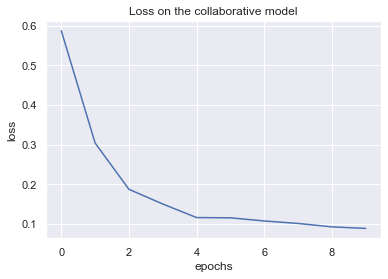

In [8]:
losses = my_scenario.mpl.history.history['mpl_model']['val_loss'][:,-1]  # All the epoch, and the last minibatch
epochs = np.arange(my_scenario.epoch_count)
ax = plt.plot(epochs, losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss on the collaborative model')

You could also be interested for example by the behaviour of the accuracy score of each partner along the epochs of the training.
These information are stored in the `history.history` dictionary. The structure of the dictionary is the following : score\[partner_id]\[metric_key][epoch_index, minibatch_index\]

The available metric_key are `'accuracy'`, `'loss'`, `'val_accuracy'`, `'val_loss'`. Metrics prefixed with `'val_'` are computed on validation dataset, and the other on the training dataset.

For instance, if you want the accuracy on the training dataset for the partner 1 at the epoch 5, minibatch 0, you can use the following code:

In [9]:
my_scenario.mpl.history.history[1]['accuracy'][5,0]

0.9711538553237915

Another key available on the dictionary, at the partner level, is `'mpl_model'`. You can use it to access to the `'val_accuracy'`, `'val_loss'` computed with the global model, at the end of each minibatch.

As this object is quite complex to handle, and advanced analysis can be tricky to compute on it, this object can be converted to a more user-friendly pandas DataFrame.

In [10]:
history_df = my_scenario.mpl.history.partners_to_dataframe()
history_df.groupby("Model").describe()

Epoch                                         Minibatch       ...  \
        count mean       std  min  25%  50%  75%  max     count mean  ...   
Partner                                                               ...   
0        30.0  4.5  2.921384  0.0  2.0  4.5  7.0  9.0      30.0  1.0  ...   
1        30.0  4.5  2.921384  0.0  2.0  4.5  7.0  9.0      30.0  1.0  ...   
2        30.0  4.5  2.921384  0.0  2.0  4.5  7.0  9.0      30.0  1.0  ...   

             loss           accuracy                                          \
              75%       max    count      mean       std       min       25%   
Partner                                                                        
0        0.266416  2.038685     30.0  0.913816  0.135609  0.302406  0.917526   
1        0.270911  1.847432     30.0  0.925197  0.109396  0.457418  0.924211   
2        0.231564  1.852676     30.0  0.923771  0.104626  0.478261  0.932044   

                                       
              50%       75%       max  
Partner                                
0        0.962199  0.979381  0.989691  
1        0.962277  0.980789  0.995879  
2        0.961098  0.979405  0.990847  

[3 rows x 48 columns]

With this dataframe advanced analysis of results gets easier.
For example, we could wonder what is the validation loss per partner along the epochs ? (on the last minibatch of each epoch):

In [11]:
losses_per_partners = history_df[history_df.Minibatch==2].pivot(index='Epoch', columns='Model', values='val_loss')
losses_per_partners

Partner,0,1,2
Epoch,,,
0,0.582495,0.537675,0.604793
1,0.338922,0.377984,0.329797
2,0.248753,0.162365,0.196594
3,0.245737,0.154633,0.159246
4,0.157987,0.133917,0.174020
5,0.197084,0.142127,0.143660
6,0.159842,0.120599,0.133160
7,0.156166,0.126364,0.165758
8,0.115931,0.190441,0.096710


Nice graphics are always more comfortable than raw dataframe, so let's plot it:

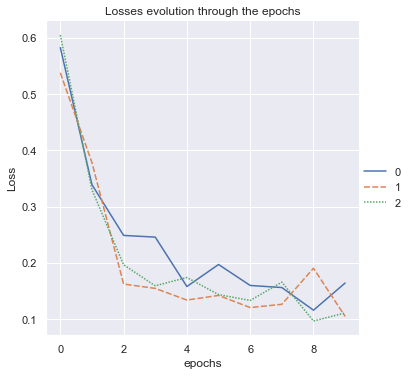

In [12]:
ax = sns.relplot(data=losses_per_partners, kind="line")
ax.set(xlabel='epochs', ylabel='Loss', title='Losses evolution through the epochs')

What about the accuracy ? On the validation dataset:

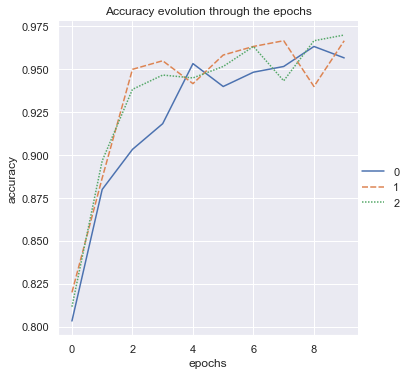

In [28]:
acc_per_partner = history_df[history_df.Minibatch==2].pivot(index='Epoch', columns='Model', values='val_accuracy')
ax = sns.relplot(data=acc_per_partner, kind="line")
ax.set(xlabel='epochs', ylabel='accuracy', title='Accuracy evolution through the epochs')

Another interesting result could be the behaviour of the collective model, compared to the partners' models:

In [29]:
score_mpl_model = my_scenario.mpl.history.history['mpl_model']['val_accuracy'][:,-1]
acc_per_partner['collective model'] = score_mpl_model
acc_per_partner

Partner,0,1,2,collective model
Epoch,,,,
0,0.803333,0.820000,0.811667,0.806667
1,0.880000,0.886667,0.896667,0.913333
2,0.903333,0.950000,0.938333,0.943333
3,0.918333,0.955000,0.946667,0.955000
4,0.953333,0.941667,0.945000,0.963333
5,0.940000,0.958333,0.951667,0.961667
6,0.948333,0.963333,0.963333,0.970000
7,0.951667,0.966667,0.943333,0.966667
8,0.963333,0.940000,0.966667,0.976667


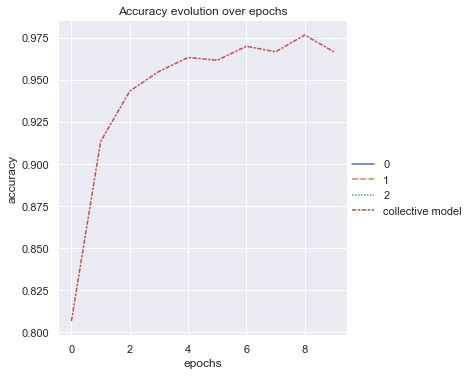

In [30]:
ax = sns.relplot(data=acc_per_partner, kind="line")
ax.set(xlabel='epochs', ylabel='accuracy', title='Accuracy evolution over epochs')

One can denote that the local models are better at start, but after few epochs, the collective model shows better abilities to generalize:

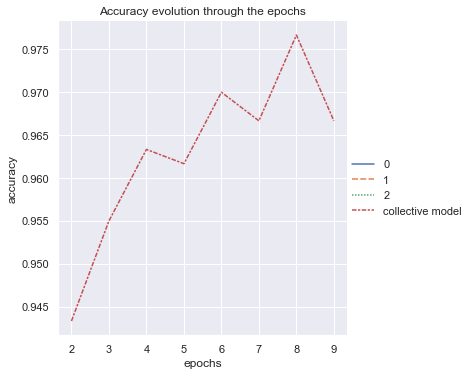

In [31]:
ax = sns.relplot(data=acc_per_partner.iloc[2:], kind="line")
ax.set(xlabel='epochs', ylabel='accuracy', title='Accuracy evolution through the epochs')

## 5 - Extract the model 

Finally, we can extract our model and use it, for example on the test set, and/or save it for later

In [19]:
model = my_scenario.mpl.build_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
___________________________________________

In [20]:
x_test = my_scenario.dataset.x_test
y_test = my_scenario.dataset.y_test
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 400us/step


[0.1096352076627547, 0.968999981880188]

# That's it!

Now you can explore our other tutorials for a better overview of what can be done with `mplc`!

This work is collaborative, enthusiasts are welcome to comment open issues and PRs or open new ones.

Should you be interested in this open effort and would like to share any question, suggestion or input, you can use the following channels:

- This Github repository (issues or PRs)
- Substra Foundation's [Slack workspace](https://substra-workspace.slack.com/join/shared_invite/zt-cpyedcab-FHYgpy08efKJ2FCadE2yCA), channel `#workgroup-mpl-contributivity`
- Email: hello@substra.org

![logo Substra Foundation](../../img/substra_logo_couleur_rvb_w150px.png)